In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Load the data
df = pd.read_excel("HBA_SALES_DATA_REFINED_v1.xlsx")

# Display basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (95, 121)

First few rows:


,style,bag_height,bag_width,gusset_width,handle_drop_length,long_strap_drop_length,material_type_x,leather_texture,hardware_color,num_of_compartments,...,article_type,factory_store_type,brandcode,fiscalyear,net_sales_qty_sum,net_sales_amt_lcl_sum,qtr_highest_sale_qty,qtr_highest_sale_amt,store_highest_sale,max_qty_sold_at_store
0,CP107,17.5,23.5,8.5,0,25.5,Leather,Pebbled,Gold,1.0,...,ZFG,factoryExclusive,COH,2025,78207,11625866.71,2,2,ECCHECFA,31013
1,CT768,24.5,24.0,5.7,0,24.5,Smooth Leather,Smooth,Gold,1.0,...,ZFG,factoryExclusive,COH,2025,36254,5253843.02,2,2,ECCHECFA,13234
2,CP099,30.0,25.8,9.0,23,58.4,Leather,Pebbled,Gold,1.0,...,ZFG,factoryExclusive,COH,2025,77,8053.09,1,1,3808,21
3,C6881,7.7,11.8,0.0,0,0.0,Crossgrain Leather,Crossgrain,Gold,1.0,...,ZFG,factoryExclusive,COH,2025,0,33.03,1,1,3802,1
4,CJ607,30.0,45.0,15.0,25.5,0.0,Canvas,NaN,Gold,1.0,...,ZFG,factoryExclusive,COH,2025,-1,-158.00,1,1,ECCHECFA,-1


In [88]:

print(df.dtypes)
print(df)

style                     object
bag_height               float64
bag_width                float64
gusset_width             float64
handle_drop_length        object
                          ...   
net_sales_amt_lcl_sum    float64
qtr_highest_sale_qty       int64
qtr_highest_sale_amt       int64
store_highest_sale        object
max_qty_sold_at_store      int64
Length: 121, dtype: object
    style  bag_height  bag_width  gusset_width handle_drop_length  \
0   CP107       17.50      23.50          8.50                  0   
1   CT768       24.50      24.00          5.70                  0   
2   CP099       30.00      25.80          9.00                 23   
3   C6881        7.70      11.80          0.00                  0   
4   CJ607       30.00      45.00         15.00               25.5   
..    ...         ...        ...           ...                ...   
90  C7803         NaN        NaN           NaN                NaN   
91  CR173        0.00      33.95          7.24            

In [89]:
pd.to_numeric(df['bag_height'])

0     17.50
1     24.50
2     30.00
3      7.70
4     30.00
      ...  
90      NaN
91     0.00
92    14.06
93      NaN
94     9.50
Name: bag_height, Length: 95, dtype: float64

In [90]:
# Function to check data values and update the datatype of the columns
def update_column_datatypes(df):
    for column in df.columns:
        try:
            # Try converting to numeric type
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            # If conversion fails, keep as object type
            df[column] = df[column].astype(str)
    return df

# Update datatypes of the columns
df_updated = update_column_datatypes(df)

print(df_updated.dtypes)
print(df_updated)

style                     object
bag_height               float64
bag_width                float64
gusset_width             float64
handle_drop_length        object
                          ...   
net_sales_amt_lcl_sum    float64
qtr_highest_sale_qty       int64
qtr_highest_sale_amt       int64
store_highest_sale        object
max_qty_sold_at_store      int64
Length: 121, dtype: object
    style  bag_height  bag_width  gusset_width handle_drop_length  \
0   CP107       17.50      23.50          8.50                  0   
1   CT768       24.50      24.00          5.70                  0   
2   CP099       30.00      25.80          9.00                 23   
3   C6881        7.70      11.80          0.00                  0   
4   CJ607       30.00      45.00         15.00               25.5   
..    ...         ...        ...           ...                ...   
90  C7803         NaN        NaN           NaN                nan   
91  CR173        0.00      33.95          7.24            

In [91]:
df['handle_drop_length'].value_counts()

handle_drop_length
0        46
nan      19
18        3
10.5      3
7         2
10.16     2
14.8      1
23        1
12.5      1
25.5      1
9         1
TBD       1
24.7      1
6         1
8.9       1
12.7      1
17        1
22        1
21        1
21.5      1
56        1
8.8       1
61        1
7.2       1
9.5       1
22.86     1
Name: count, dtype: int64

In [92]:
df['long_strap_drop_length'].value_counts()

long_strap_drop_length
0.00     33
56.00     4
57.00     4
58.50     3
60.00     3
55.00     2
61.00     2
63.50     2
58.40     2
57.15     2
58.00     2
55.88     2
55.50     1
24.50     1
25.50     1
73.00     1
55.90     1
57.50     1
22.50     1
51.00     1
59.00     1
25.00     1
90.00     1
21.50     1
53.00     1
53.34     1
Name: count, dtype: int64

In [93]:
# # Rename columns
# df.rename(columns={'handle_drop': 'handle_drop_length', 'long_strap_drop': 'long_strap_drop_length'}, inplace=True)
# incorrect_dtype_columns = ['handle_drop_length', 'long_strap_drop_length']
# df[incorrect_dtype_columns] = df[incorrect_dtype_columns].astype(float)

In [94]:
## 3. Data Preprocessing

### 3.1 Check for Missing Values


# Check for missing values
missing_values = df.isnull().sum()
print("Features with missing values:")
print(missing_values[missing_values > 0])

Features with missing values:
bag_height                 19
bag_width                  19
gusset_width               18
long_strap_drop_length     20
num_of_compartments         5
num_of_int_pockets          2
num_of_int_zip_pockets      2
num_of_int_slip_pockets     2
num_of_ext_pockets          2
num_of_ext_zip_pockets      2
num_of_ext_slip_pockets     2
total_pocket_count          2
top_opening_width           9
card_slot_count             1
stitching_density           6
logo_size                   6
hidden_snap                94
collaboration              95
dtype: int64


In [95]:
df["logo_type"].value_counts()


logo_type
nan             36
Embossed        30
Metal           24
Printed          4
Blind emboss     1
Name: count, dtype: int64

In [96]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['style',
 'handle_drop_length',
 'material_type_x',
 'leather_texture',
 'hardware_color',
 'closure_type',
 'silhouette_type',
 'bag_shape',
 'color',
 'interior_lining',
 'strap_type',
 'strap_connector',
 'edge_finishing',
 'embellishment',
 'opener_design',
 'opener_material',
 'top_handle_style',
 'logo_placement',
 'logo_style',
 'logo_type',
 'finish_type',
 'File Name',
 'style_code',
 'department_desc',
 'gender',
 'class',
 'subclass',
 'collection',
 'subcollection',
 'licensed',
 'material',
 'material_type_y',
 'silhouette',
 'style_group',
 'size_code',
 'article_type',
 'factory_store_type',
 'brandcode',
 'store_highest_sale']

In [97]:

### 3.2 Handle Missing Values


# Fill missing categorical values with 'Unknown'
# df['color'] = df['color'].fillna('Unknown')

df[categorical_features] = df[categorical_features].fillna('Unknown')

# Verify no more missing values
print("Missing categorical_features values after handling:", df[categorical_features].isnull().sum().sum())

Missing categorical_features values after handling: 0


In [98]:
# Fill missing categorical values with '0'
df = df.fillna(0)
# Verify no more missing values
print("Missing categorical_features values after handling:", df.isnull().sum().sum())

Missing categorical_features values after handling: 0


In [99]:

### 3.3 Identify and Remove Constant Features



# Identify features with only one unique value
constant_features = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_features.append(col)

print(f"Found {len(constant_features)} constant features:")
print(constant_features)

Found 27 constant features:
['limited_edition', 'colorblock_design', 'quilted_pattern', 'luggage_sleeve', 'water_bottle_pocket', 'built_in_mirror', 'monogram_option', 'key_leash', 'twist_lock', 'bow_element', 'floral_elements', 'animal_print', 'stripe_pattern', 'woven_elements', 'pearl_elements', 'pleat_count', 'kisslock_frame', 'collapsible_gusset', 'pen_loops', 'gender', 'article_cat_ind', 'licensed', 'collaboration', 'size_code', 'article_type', 'brandcode', 'fiscalyear']


In [100]:

# Remove constant features
df_clean = df.drop(columns=constant_features)
print(f"\nDataset shape after removing constant features: {df_clean.shape}")


Dataset shape after removing constant features: (95, 94)


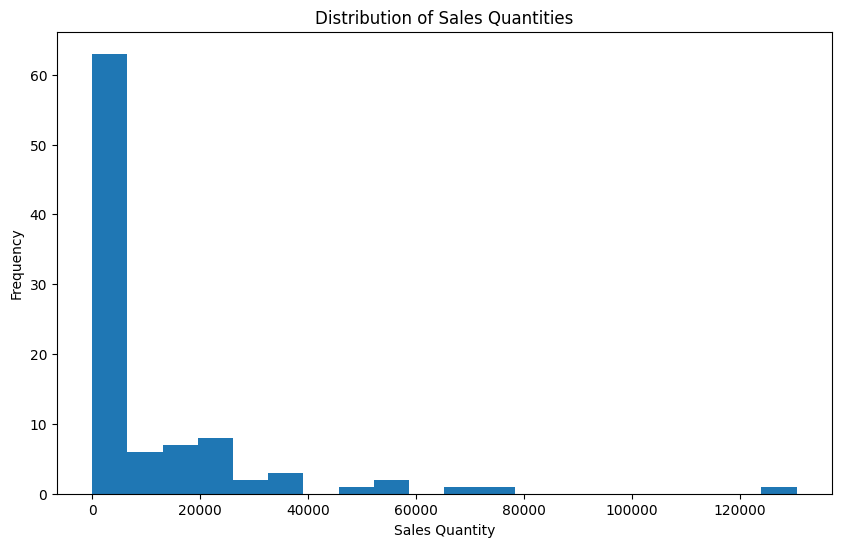

In [101]:
### 3.4 Create Sales Performance Categories

# We'll create a categorical target variable based on sales quantity to use with Naive Bayes.



# Examine the distribution of sales quantities
plt.figure(figsize=(10, 6))
plt.hist(df_clean['net_sales_qty_sum'], bins=20)
plt.title('Distribution of Sales Quantities')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.show()



In [102]:
# Create sales performance categories
sales_quantiles = df_clean['net_sales_qty_sum'].quantile([0.25, 0.5, 0.75])
print("Sales quantiles:")
print(sales_quantiles)

def categorize_sales(x):
    if x <= sales_quantiles[0.25]:
        return 'Low'
    elif x <= sales_quantiles[0.5]:
        return 'Medium'
    # elif x <= sales_quantiles[0.75]:
    #     return 'Medium-High'
    else:
        return 'High'
    

df_clean['sales_category'] = df_clean['net_sales_qty_sum'].apply(categorize_sales)
print("\nSales category distribution:")
print(df_clean['sales_category'].value_counts())    

Sales quantiles:
0.25        3.0
0.50     1018.0
0.75    16572.0
Name: net_sales_qty_sum, dtype: float64

Sales category distribution:
sales_category
High      47
Low       26
Medium    22
Name: count, dtype: int64


In [103]:
### 3.5 Feature Selection

# select a subset of potentially important features for our analysis:



# Select features that are likely to influence sales
selected_features = [
    'bag_height', 'bag_width', 'gusset_width', 'handle_drop', 'long_strap_drop',
    'material_type_x', 'leather_texture', 'hardware_color', 'num_of_compartments',
    'closure_type', 'logo_visibility', 'silhouette_type', 'bag_shape',
    'num_of_int_pockets', 'num_of_int_zip_pockets', 'num_of_int_slip_pockets',
    'total_pocket_count', 'strap_type', 'edge_finishing', 'hardware_quality',
    'bottom_structure', 'bottom_feet', 'hangtag_presence', 'removable_strap',
    'adjustable_strap', 'opener_design', 'opener_material', 'top_opening_width',
    'crossbody_option', 'shoulder_option', 'hand_carry_option', 'wristlet_option',
    'wallet_function', 'phone_compatibility', 'ease_of_access', 'stitching_density',
    'num_of_strap_options', 'charm_attachment_point', 'hidden_pocket', 'top_handle_style',
    'logo_placement', 'logo_size', 'logo_style', 'logo_type', 'is_symmetrical',
    'exposed_zipper', 'finish_type', 'department_desc', 'class', 'subclass',
    'collection', 'subcollection', 'material', 'material_type_y', 'silhouette',
    'style_group', 'size_code', 'color_count'
]

# Check if all selected features exist in the dataframe
missing_cols = [col for col in selected_features if col not in df_clean.columns]
if missing_cols:
    print(f"Warning: These columns are not in the dataframe: {missing_cols}")
    selected_features = [col for col in selected_features if col in df_clean.columns]

# Create a dataframe with only the selected features and the target
df_selected = df_clean[selected_features + ['sales_category']]
print(f"Selected dataset shape: {df_selected.shape}")

Selected dataset shape: (95, 56)


In [104]:
df_selected["bag_height"]


0     17.50
1     24.50
2     30.00
3      7.70
4     30.00
      ...  
90     0.00
91     0.00
92    14.06
93     0.00
94     9.50
Name: bag_height, Length: 95, dtype: float64

In [105]:
categorical_features = df_selected.select_dtypes(include=['object']).columns.tolist()

categorical_features

['material_type_x',
 'leather_texture',
 'hardware_color',
 'closure_type',
 'silhouette_type',
 'bag_shape',
 'strap_type',
 'edge_finishing',
 'opener_design',
 'opener_material',
 'top_handle_style',
 'logo_placement',
 'logo_style',
 'logo_type',
 'finish_type',
 'department_desc',
 'class',
 'subclass',
 'collection',
 'subcollection',
 'material',
 'material_type_y',
 'silhouette',
 'style_group',
 'sales_category']

In [106]:
df_selected

,bag_height,bag_width,gusset_width,material_type_x,leather_texture,hardware_color,num_of_compartments,closure_type,logo_visibility,silhouette_type,...,class,subclass,collection,subcollection,material,material_type_y,silhouette,style_group,color_count,sales_category
0,17.50,23.50,8.50,Leather,Pebbled,Gold,1.0,Buckle,1,Saddle,...,LTH,CSB,NVL,LUE,LTR,LTH,CRO,ameliaSaddleBag,11,High
1,24.50,24.00,5.70,Smooth Leather,Smooth,Gold,1.0,Flap with Magnet,1,Shoulder Bag,...,LTH,SHB,LEA,LHW,LTR,LTH,SHB,andreaShoulderBag,9,High
2,30.00,25.80,9.00,Leather,Pebbled,Gold,1.0,Zipper,1,Hobo,...,LTH,SHB,LEA,LHW,LTR,LTH,SHB,ariaShoulderBag,2,Medium
3,7.70,11.80,0.00,Crossgrain Leather,Crossgrain,Gold,1.0,Zipper,1,Card Case,...,LTH,SAC,LEA,CRI,LTR,LTH,CAR,attachmentCardCase,5,Low
4,30.00,45.00,15.00,Canvas,nan,Gold,1.0,Zipper,1,Tote,...,MIX,TOT,NLR,CNS,CNV,MIX,TOT,canvasTote,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.00,0.00,0.00,R,nan,nan,0.0,nan,0,Micro Court Backpack Bag Charm,...,CKL,CHM,BCA,SVC,PVC,TXT,BGC,miniCourtBackpackBagCharm,7,Medium
91,0.00,33.95,7.24,R,nan,nan,1.0,Full Lock,0,nan,...,MIX,CSB,NLR,CQS,PVC,TXT,CRO,miniJamieCameraBag,1,Low
92,14.06,14.06,3.00,Leather,LA,nan,1.0,nan,0,Mini Rowan,...,LTH,MFU,LEA,CRI,LTR,nan,CRO,miniRowan,10,High
93,0.00,0.00,1.30,R,nan,nan,0.0,nan,0,Wallet,...,LTH,SMW,LEA,RFB,LTR,LTH,SWA,snapWallet,72,High


In [107]:
df_selected.to_excel('df_selected.xlsx',index=False)


In [108]:

### 3.6 Encode Categorical Features



# Identify categorical features
categorical_features = df_selected.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('sales_category')  # Remove target variable from the list

print(f"Number of categorical features: {len(categorical_features)}")

# Encode categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_selected[feature] = le.fit_transform(df_selected[feature])
    label_encoders[feature] = le

# Encode the target variable
target_encoder = LabelEncoder()
df_selected['sales_category'] = target_encoder.fit_transform(df_selected['sales_category'])
print("Target classes:", target_encoder.classes_)

Number of categorical features: 24
Target classes: ['High' 'Low' 'Medium']


In [109]:
# Get mapping (original -> encoded)
label_map = {label: index for index, label in enumerate(le.classes_)}

# Print mapping
print(label_map)

{'aliceSatchel': 0, 'ameliaSaddleBag': 1, 'andreaShoulderBag': 2, 'ariaShoulderBag': 3, 'attachmentCardCase': 4, 'brieMiniCrossbody': 5, 'canvasTote': 6, 'carmenMiniCrossbody': 7, 'cityLargeBucket': 8, 'cityTote': 9, 'convertibleMiniBackpack': 10, 'courtBackpack': 11, 'courtBeltBag': 12, 'darcieCarryall': 13, 'dempseyFileBag': 14, 'doubleCornerZip': 15, 'elizaFlapCrossbody': 16, 'elizaMiniCarryall': 17, 'elizaSmallWallet': 18, 'elizaTopHandle': 19, 'georgiaSatchel': 20, 'hadleyCrossbody': 21, 'hadleyMiniCrossbody': 22, 'hannaBucketBag': 23, 'heartCrossbody': 24, 'jamieCrossbody': 25, 'jamieWristlet': 26, 'jesBackpack': 27, 'jordynBackpack': 28, 'julesHobo': 29, 'laceyCrossbody': 30, 'largeCornerZip': 31, 'largeCourtBackpack': 32, 'largeRowanSatchel': 33, 'laurelShoulderBag': 34, 'lonnieCrossbody': 35, 'lucyCrossbody': 36, 'madiCrossbody': 37, 'meadowShoulderBag': 38, 'microWallet': 39, 'miniCityZipTote': 40, 'miniCourtBackpackBagCharm': 41, 'miniDarcieCarryall': 42, 'miniDempseyBucketB

In [110]:

# Get mapping (original -> encoded)
label_map = {label: index for index, label in enumerate(target_encoder.classes_)}

# Print mapping
print(label_map)

{'High': 0, 'Low': 1, 'Medium': 2}


In [111]:
df_selected

,bag_height,bag_width,gusset_width,material_type_x,leather_texture,hardware_color,num_of_compartments,closure_type,logo_visibility,silhouette_type,...,class,subclass,collection,subcollection,material,material_type_y,silhouette,style_group,color_count,sales_category
0,17.50,23.50,8.50,8,5,0,1.0,0,1,22,...,2,3,3,8,3,0,4,1,11,0
1,24.50,24.00,5.70,24,7,0,1.0,3,1,24,...,2,8,1,7,3,0,11,2,9,0
2,30.00,25.80,9.00,8,5,0,1.0,11,1,13,...,2,8,1,7,3,0,11,3,2,2
3,7.70,11.80,0.00,4,1,0,1.0,11,1,4,...,2,7,1,3,3,0,3,4,5,1
4,30.00,45.00,15.00,2,10,0,1.0,11,1,27,...,3,11,2,1,0,1,14,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.00,0.00,0.00,19,10,3,0.0,12,0,15,...,0,1,0,19,5,2,1,41,7,2
91,0.00,33.95,7.24,19,10,3,1.0,4,0,31,...,3,3,2,2,5,2,4,45,1,1
92,14.06,14.06,3.00,8,3,3,1.0,12,0,18,...,2,5,1,3,3,3,4,46,10,0
93,0.00,0.00,1.30,19,10,3,0.0,12,0,29,...,2,10,1,14,3,0,12,61,72,0


In [112]:
# import joblib

# # # Save the model
# # joblib.dump(gnb, 'naive_bayes_model.pkl')

# # # Save the encoders
# # joblib.dump(label_encoders, 'label_encoders.pkl')
# # joblib.dump(target_encoder, 'target_encoder.pkl')


# ### Web Application using Flask
# import os

# import os
# os.environ["PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT"] = "5.0"  # Increase timeout
# os.environ["PYDEVD_DISABLE_SLOW_RESOLVE_WARNINGS"] = "1"

# from flask import Flask, render_template, request
# import pandas as pd
# # from sklearn.externals import joblib

# app = Flask(__name__)

# # Load the model and encoders
# model = joblib.load('naive_bayes_model.pkl')
# label_encoders = joblib.load('label_encoders.pkl')
# target_encoder = joblib.load('target_encoder.pkl')
# import time
# # time.sleep(20)

# # # Load the dataframe for unique values in UI
# # df_selected = pd.read_parquet('prediction_uiData.pq')  # Replace with your actual CSV file



# @app.route('/', methods=['GET', 'POST'])
# def predict():

#     import time
#     # time.sleep(20)
#     print(df_selected.dtypes)
#     print(df_selected.columns)
#     categorical_features = df_selected.select_dtypes(include=['object']).columns.tolist()
#     if "sales_category" in categorical_features:
#         categorical_features.remove('sales_category')  # Ensure not to include the target

#     input_data = {}

#     if request.method == 'POST':
        
        
#         for feature in categorical_features:
#             value = request.form[feature]
#             # Use the label encoder
#             encoded_value = label_encoders[feature].transform([value])[0]
#             input_data[feature] = encoded_value

#         X_new = pd.DataFrame([input_data], columns=categorical_features)
#         prediction = model.predict(X_new)
#         prediction_proba = model.predict_proba(X_new)

#         # Decode the prediction
#         result = target_encoder.inverse_transform(prediction)[0]
#         return f'Result: {result} with probabilities {prediction_proba}'

#     # Preparing values for the dropdown
#     unique_values = {feature: df_selected[feature].unique() for feature in categorical_features}
#     return render_template('index.html', features=categorical_features, unique_values=unique_values)

# if __name__ == '__main__':
#     app.run(debug=False)

In [113]:

## 4. Feature Selection with Statistical Tests



# Separate features and target
X = df_selected.drop('sales_category', axis=1)
y = df_selected['sales_category']

# Apply ANOVA F-test for feature selection
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

# Display selected features and their scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

feature_scores = feature_scores.sort_values('Score', ascending=False)
print("Top 15 features by ANOVA F-test:")
print(feature_scores.head(15))

# Create a dataframe with only the selected features
X_selected = X[selected_feature_names]

Top 15 features by ANOVA F-test:
              Feature      Score
51    material_type_y  10.077084
50           material   4.142624
1           bag_width   3.458059
25  top_opening_width   3.451447
45    department_desc   3.298391
49      subcollection   2.904046
39          logo_size   2.564507
40         logo_style   2.539576
22   adjustable_strap   2.340957
7        closure_type   2.210221
2        gusset_width   2.152477
27    shoulder_option   2.094112
0          bag_height   2.014305
44        finish_type   1.949693
23      opener_design   1.690775


In [116]:
import joblib
# selected_feature_names
print(selected_feature_names)
joblib.dump(selected_feature_names, 'model_features.pkl')

Index(['bag_height', 'bag_width', 'gusset_width', 'closure_type',
       'adjustable_strap', 'opener_design', 'top_opening_width',
       'shoulder_option', 'logo_size', 'logo_style', 'finish_type',
       'department_desc', 'subcollection', 'material', 'material_type_y'],
      dtype='object')


['model_features.pkl']

In [ ]:
X_selected.to_excel("prediction_uiData.xlsx",index=False)

In [170]:
df_selected.columns

Index(['bag_height', 'bag_width', 'gusset_width', 'material_type_x',
       'leather_texture', 'hardware_color', 'num_of_compartments',
       'closure_type', 'logo_visibility', 'silhouette_type', 'bag_shape',
       'num_of_int_pockets', 'num_of_int_zip_pockets',
       'num_of_int_slip_pockets', 'total_pocket_count', 'strap_type',
       'edge_finishing', 'hardware_quality', 'bottom_structure', 'bottom_feet',
       'hangtag_presence', 'removable_strap', 'adjustable_strap',
       'opener_design', 'opener_material', 'top_opening_width',
       'crossbody_option', 'shoulder_option', 'hand_carry_option',
       'wristlet_option', 'wallet_function', 'phone_compatibility',
       'ease_of_access', 'stitching_density', 'num_of_strap_options',
       'charm_attachment_point', 'hidden_pocket', 'top_handle_style',
       'logo_placement', 'logo_size', 'logo_style', 'logo_type',
       'is_symmetrical', 'exposed_zipper', 'finish_type', 'department_desc',
       'class', 'subclass', 'collectio

In [83]:
X_selected.columns

Index(['bag_height', 'bag_width', 'gusset_width', 'closure_type',
       'adjustable_strap', 'opener_design', 'top_opening_width',
       'shoulder_option', 'logo_size', 'logo_style', 'finish_type',
       'department_desc', 'subcollection', 'material', 'material_type_y'],
      dtype='object')

In [84]:
[x for x in X_selected.columns if x not in df_selected.columns]

[]

In [163]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Identify numerical columns
# numerical_cols = df_selected.select_dtypes(include=['number']).columns

# # Plot distribution for each numerical column separately
# for col in numerical_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df_selected[col], kde=True, bins=20)
#     plt.title(f"Distribution of {col}")
#     plt.xlabel(col)
#     plt.ylabel("Density")
#     plt.show()


Model Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.71      0.69        14
         Low       0.57      0.50      0.53         8
      Medium       0.43      0.43      0.43         7

    accuracy                           0.59        29
   macro avg       0.56      0.55      0.55        29
weighted avg       0.58      0.59      0.58        29



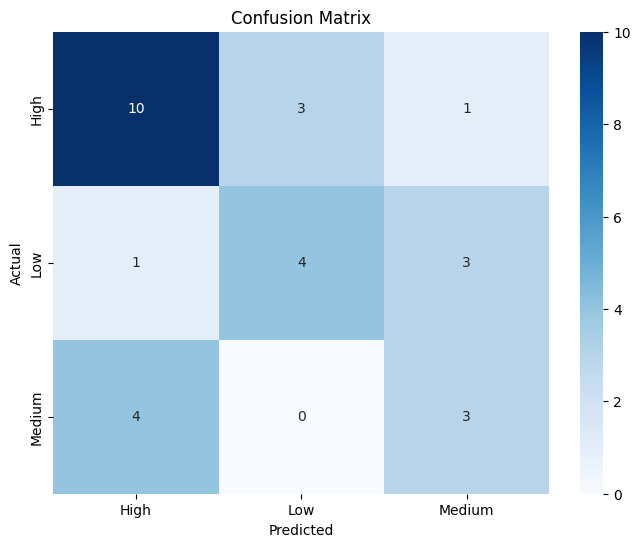

In [103]:


## 5. Apply Naive Bayes Classification



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [167]:
import joblib

# Save the model
joblib.dump(gnb, 'naive_bayes_model.pkl')

# Save the encoders
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(target_encoder, 'target_encoder.pkl')


['target_encoder.pkl']

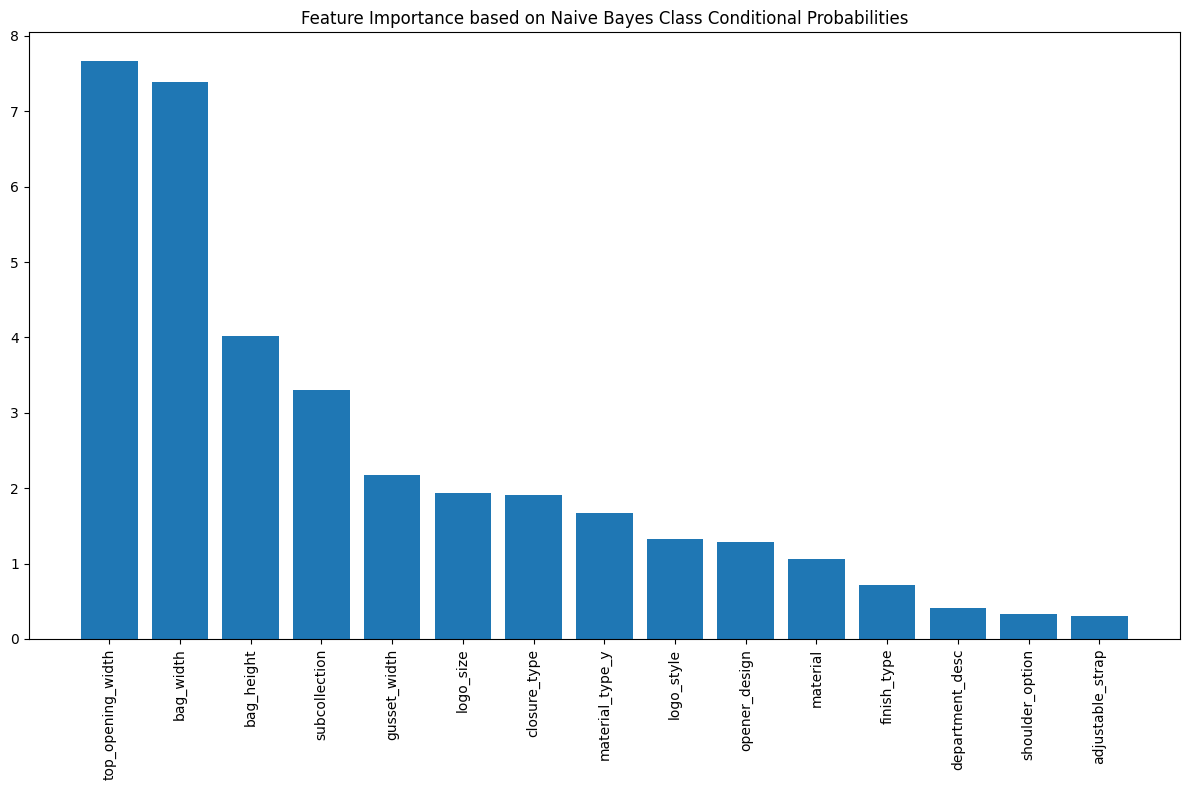

Top 10 most important features:
1. top_opening_width: 7.6653
2. bag_width: 7.3903
3. bag_height: 4.0138
4. subcollection: 3.3081
5. gusset_width: 2.1740
6. logo_size: 1.9333
7. closure_type: 1.9152
8. material_type_y: 1.6727
9. logo_style: 1.3212
10. opener_design: 1.2889


In [104]:
## 6. Feature Importance Analysis



# Calculate feature importance as the difference in class conditional probabilities
feature_importance = {}
for i, feature in enumerate(selected_feature_names):
    feature_importance[feature] = np.max(gnb.theta_[:, i]) - np.min(gnb.theta_[:, i])

# Sort features by importance
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance.keys(), feature_importance.values())
plt.xticks(rotation=90)
plt.title('Feature Importance based on Naive Bayes Class Conditional Probabilities')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("Top 10 most important features:")
for i, (feature, importance) in enumerate(list(feature_importance.items())[:10]):
    print(f"{i+1}. {feature}: {importance:.4f}")


In [117]:
df_original["subcollection"].value_counts()

subcollection
RFB    26
CRI    15
SVC    10
DFR     8
LHW     6
SMA     6
SZL     3
CQS     3
LUE     2
SJD     2
PWE     2
DEO     2
CNS     1
SAJ     1
OAC     1
ARP     1
MUC     1
DIA     1
SBK     1
nan     1
MUH     1
OLI     1
Name: count, dtype: int64

In [169]:
# !pip install flask

  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)


In [162]:

## 7. Probabilistic Analysis of Feature Combinations


import pandas.api.types as ptypes

# Select top 5 most important features
top_features = list(feature_importance.keys())[:10]

# Create a dataframe with original values for better interpretability
df_original = df.copy()
df_original["sales_category"] = df_selected['sales_category']
for feature in top_features:
    if feature in categorical_features:
        # Map back to original categories for categorical features
        df_original[feature + '_encoded'] = df_selected[feature]

# Calculate conditional probabilities for each feature given the sales category
print("Conditional Probabilities for Top Features:")
for feature in top_features:
    if feature in df_original.columns:
        if ptypes.is_numeric_dtype(df[feature]):
        # For numerical features
            print(f"\n{feature}:")
            for category in df_original['sales_category'].unique():
                mean_val = df_original[df_original['sales_category'] == category][feature].mean()
                std_val = df_original[df_original['sales_category'] == category][feature].std()
                print(f"  {category}: Mean = {mean_val:.2f}, Std = {std_val:.2f}")
        else:
                # continue
            # For encoded categorical features
            print(f"\n{feature}:")
            for category in df_original['sales_category'].unique():
                value_counts = df_original[df_original['sales_category'] == category][feature + '_encoded'].value_counts(normalize=True)
                print(f"  {category}:")
                for val, prob in value_counts.items():
                    original_val = label_encoders[feature].inverse_transform([val])[0]
                    print(f"    {original_val}: {prob:.2f}")

Conditional Probabilities for Top Features:

top_opening_width:
  0: Mean = 13.87, Std = 11.25
  2: Mean = 10.15, Std = 11.18
  1: Mean = 19.23, Std = 14.27

bag_width:
  0: Mean = 14.59, Std = 11.55
  2: Mean = 10.88, Std = 11.50
  1: Mean = 19.99, Std = 13.73

bag_height:
  0: Mean = 11.51, Std = 9.12
  2: Mean = 9.04, Std = 10.62
  1: Mean = 14.77, Std = 10.90

subcollection:
  0:
    RFB: 0.30
    SVC: 0.13
    DFR: 0.09
    LHW: 0.09
    SMA: 0.09
    SZL: 0.06
    CRI: 0.06
    DEO: 0.04
    LUE: 0.04
    SJD: 0.02
    SAJ: 0.02
    ARP: 0.02
    MUC: 0.02
    OLI: 0.02
  2:
    RFB: 0.23
    CRI: 0.23
    SVC: 0.14
    DFR: 0.14
    SMA: 0.09
    LHW: 0.09
    nan: 0.05
    MUH: 0.05
  1:
    CRI: 0.27
    RFB: 0.27
    CQS: 0.12
    PWE: 0.08
    CNS: 0.04
    DIA: 0.04
    OAC: 0.04
    SJD: 0.04
    SVC: 0.04
    DFR: 0.04
    SBK: 0.04

gusset_width:
  0: Mean = 5.33, Std = 4.98
  2: Mean = 3.89, Std = 4.57
  1: Mean = 6.87, Std = 5.32

logo_size:
  0: Mean = 1.24, Std = 1.4

In [123]:
top_features

['top_opening_width',
 'bag_width',
 'bag_height',
 'subcollection',
 'gusset_width']

In [154]:

# ## 8. Analyze Feature Combinations



# # Create combinations of top features
# df_combo = df_selected[top_features + ['sales_category']].copy()

# # Map sales category back to original labels
# df_combo['sales_category'] = target_encoder.inverse_transform(df_combo['sales_category'])

# # Create feature combinations
# df_combo['width_pockets'] = df_combo['bag_width'] * df_combo['total_pocket_count']
# df_combo['width_wristlet'] = df_combo['bag_width'] * df_combo['wristlet_option']

# # Analyze combinations
# print("Feature Combination Analysis:")
# for combo in ['width_pockets', 'width_wristlet']:
#     print(f"\n{combo} by Sales Category:")
#     for category in df_combo['sales_category'].unique():
#         mean_val = df_combo[df_combo['sales_category'] == category][combo].mean()
#         print(f"  {category}: Mean = {mean_val:.2f}")

# # Visualize feature combinations
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.boxplot(x='sales_category', y='width_pockets', data=df_combo)
# plt.title('Bag Width * Total Pocket Count by Sales Category')
# plt.xticks(rotation=45)

# plt.subplot(1, 2, 2)
# sns.boxplot(x='sales_category', y='width_wristlet', data=df_combo)
# plt.title('Bag Width * Wristlet Option by Sales Category')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

In [160]:
import pandas as pd
import dowhy
from dowhy import CausalModel
from dowhy.datasets import linear_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = df 

# Select features of interest
features_of_interest = [
    'bag_height', 'bag_width', 'gusset_width', 'material_type_x',
    'hardware_color', 'num_of_compartments', 'closure_type',
    'num_of_int_pockets', 'num_of_ext_pockets', 'total_pocket_count'
]

# Treatment and outcome variables
treatment_variable = 'bag_height'  # Example treatment variable
outcome_variable = 'net_sales_amt_lcl_sum'  # Example outcome variable

# Convert categorical variables to numerical if necessary
for feature in features_of_interest:
    if data[feature].dtype == 'object':
        data[feature] = pd.factorize(data[feature])[0]

# Define the causal model
model = CausalModel(
    data=data,
    treatment=treatment_variable,
    outcome=outcome_variable,
    common_causes=features_of_interest
)

# View assumptions
model.view_model(layout="dot")
from IPython.display import Image, display
display(Image(filename="causal_model.png"))


ValueError: Node bag_height has a self-cycle, i.e. a node pointing to itself. Plotting self-cycles is currently only supported for plots using Graphviz! Consider installing the corresponding requirements.

In [161]:
!pip install pygraphviz

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz


  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [88 lines of output]
      D:\Users\gkharad\AppData\Local\Temp\pip-build-env-nsci302b\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`.
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ********************************************************************************
      
    

In [ ]:

# Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

# Estimate the causal effect
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1
)

# Print estimation summary
print(causal_estimate)

# Check assumptions
res_random = model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

res_placebo = model.refute_estimate(identified_estimand, causal_estimate, method_name="placebo_treatment_refuter")
print(res_placebo)

res_subset = model.refute_estimate(identified_estimand, causal_estimate, method_name="data_subset_refuter")
print(res_subset)

# Visualization
sns.scatterplot(data=data, x=treatment_variable, y=outcome_variable)
plt.title("Relation between Treatment and Outcome")
plt.show()